# Exercise 1: Introduction to Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Enter Data

In [3]:
# Enter the data
df = pd.read_excel('small-house-data.xlsx')
df.head()

,price,sqft_living
0,221900,1180
1,538000,2570
2,180000,770
3,604000,1960
4,510000,1680


In [34]:
# Split into x (and turn it into m2) and y
x, y = df['sqft_living']/10.764, df['price']

In [35]:
x[0:3], y[0:3]

(0    109.624675
 1    238.758826
 2     71.534745
 Name: sqft_living, dtype: float64,
 0    221900
 1    538000
 2    180000
 Name: price, dtype: int64)

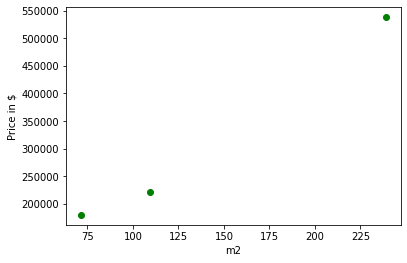

In [36]:
# Plot output of new observations
plt.scatter(x[0:3], y[0:3], color='green')
plt.xlabel('m2')
plt.ylabel('Price in $')
plt.show()

In [37]:
from typing import Tuple, List

Vector = List[float]

## Prepare Regression Parameters

In [10]:
# predicted price

def pprice(a: float, b: float, x:float) -> float:
    return(b*x + a)

In [12]:
# The error
def error(a: float, b: float, x: float, y: float) -> float:
    return y - pprice(a,b,x)

In [13]:
pprice(-4.47515219e+05, 5.11109376e+03, 109.624675)

112786.77333452803

In [18]:
# Test
err = error(-4.47515219e+05, 5.11109376e+03, 109.624675, 221900)
err

109113.22666547197

Single observation and error are far from sufficient, and can be both positive and negative.

In [19]:
# Sum of squared errors (RSS - Residual Sum of Squares)
def sum_err(a:float, b:float, x:Vector, y:Vector) -> float:
    return sum(error(a, b, xi, yi)**2
              for xi, yi in zip(x, y))

In [28]:
sum_err(-4.47515219e+05, 5.11109376e+03, x, y)

2164874083613790.5

## Least Squares

The ordinary least squares solution (OLS) is this that makes the sum of squared errors minimal. 

In [38]:
# a, b - a tuple[a, b]
from numpy import mean
from numpy import std
from numpy import cov
from scipy.stats import pearsonr

def least_sq(x:Vector, y:Vector)-> Tuple[float, float]:
    r = cov(x, y)/std(x)*std(y)
    # b = cov(x, y)/(std(x)*std(x))
    # r = pearsonr(x, y)
    b = r * (std(y)/std(x))
    a = mean(y)-b*mean(x)
    return a, b

In [39]:
least_sq(x,y)

(array([[-2.60436480e+13, -7.86682805e+16],
        [-7.86682805e+16, -4.82147470e+20]]),
 array([[1.34782378e+11, 4.07127977e+14],
        [4.07127977e+14, 2.49523344e+18]]))

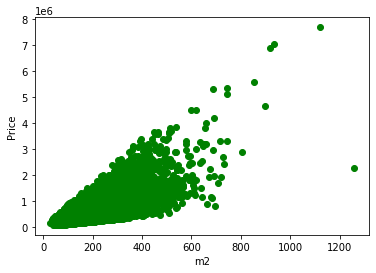

In [41]:
# Plot output

plt.scatter(x, y, color='green')
plt.xlabel('m2')
plt.ylabel("Price")
plt.show()

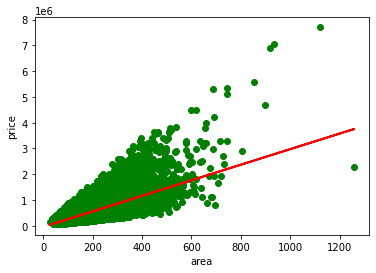

In [46]:
# plot the prediction
plt.xlabel('area')
plt.ylabel('price')
# plt.legend()

plt.scatter(x, y, color='green', label = 'test data')
plt.plot(x, pprice(-4.36077498e+04, 3.02077185e+03, x), color='red', linewidth=2, label= 'predicted regression line')

plt.show()